### Σχεδιασμός Ιδιοσυναρτήσεων του απλού αρμονικού ταλαντωτή

Ο απλός αρμονικός ταλαντωτής (AAT) είναι ένα από τα σημαντικότερα συστήματα στην κβαντική μηχανική για τους ακόλουθους λόγους:
1. Μπορεί να λυθεί αναλυτικά
2. Ένα αρμονικό δυναμικό μπορεί να χρησιμοποιηθεί για την προσέγγιση πολλών άλλων, πιο περίπλοκων δυναμικών
3. Είναι θεμέλιο για πιο προηγμένη φυσική, από την κατανόηση των φονονίων στα υλικά έως τη θεωρία του κβαντικού πεδίου

Οπως είδαμε, οι ανεξάρτητες, κανονικοποιημένες σταθερές (stationary) καταστάσεις για το AAT δίδονται από την άποψη των Hermite Polynomials, $h_n(\xi) $, από

$$ \psi_n(x) = \left( \frac{m\omega}{\pi \hbar}\right)^{1/4}\frac{1}{\sqrt{2^nn!}}H_n(\xi)e^{-\xi^2/2}$$
$$ \xi = \sqrt{\frac{m\omega}{\hbar}}x$$ (4.118, Zettili)

Θέλουμε τώρα να σχεδιάσουμε τις ιδιοσυναρτήσεις της ενέργειας.
Οι στόχοι είναι:
1. Να υπολογίσουμε τις ανεξάρτητες του χρόνου κυματοσυναρτήσεις των ιδιοκαταστάσεων, $\psi_n(x)$, στην Python.
2. Να τις σχεδιάσουμε.
3. Να συγκρίνουμε τη συμπεριφορά ενός κβαντικού αρμονικού ταλαντωτή από έναν κλασικό αρμονικό ταλαντωτή.

Για έναν κλασικό αρμονικό ταλαντωτή με ενέργεια $E$, η κλασική πιθανότητα εύρεσης του σωματιδίου στα $ x $ δίνεται από:

$$ P_{classical}(x)= \frac{1}{\pi \sqrt{x_{max}^2-x^2}} $$
$$ x_{max} = \sqrt{\frac{2E}{m\omega^2}}$$
Όπου $ x_ {max} $ είναι το κλασικό σημείο μέγιστης απομάκρυνσης και το $ P_ {classical} (x) $ θεωρείται ότι είναι μηδέν για $|x|>|x_ {max}|$.


#### Καθορισμός Παραμέτρων-Βιβλιοθηκών
Αυτές είναι όλες οι βιβλιοθήκες που θα χρειαστούμε:

In [3]:
%matplotlib ipympl
import matplotlib
import matplotlib.pyplot as plt 
import numpy
import numpy.polynomial.hermite as Herm
import math

Και εδώ είναι οι παράμετροι που θα χρησιμοποιήσουμε και ο χώρος για να σχεδιάσουμε τις κυματοσυναρτήσεις.

In [4]:
# Επιλέξτε απλές μονάδες
m=1.
w=1.
hbar=1.

# Διακριτός χώρος
dx = 0.05
x_lim = 12
x = numpy.arange(-x_lim,x_lim,dx)

#### Ερώτηση 1: Hermite Polynomials

Θυμηθείτε ότι το $\xi$ είναι συνάρτηση του $x$. (Δεδομένου ότι ορίσαμε $m =\omega = \hbar = 1$), $\xi$ εξαρτάται μόνο από το x πια. Πρέπει να διαβάσετε τον ορισμό της [numpy.polynomial.hermite.hermval](https://numpy.org/doc/2.1/reference/generated/numpy.polynomial.hermite.hermval.html) συνάρτησης.

In [5]:
def hermite(x, n):
    xi = numpy.sqrt(m*w/hbar)*x

    # Φτιάξτε initialization array μηδενικών στοιχείων για τους συντελεστές
    # Βαλτε συντελεστή μόνο στο ζητούμενο σ΄ αυτή
    return Herm.hermval(xi, herm_coeffs)

Ο παρακάτω κώδικας σχεδιάζει τα πρώτα 5 Hermite Polynomials με βάση την παραπάνω συνάρτηση.

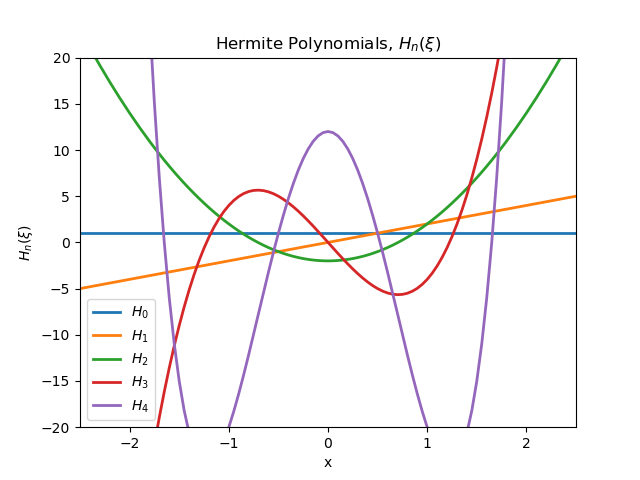

In [6]:
plt.figure()
plt.plot(x, hermite(x,0), linewidth=2,label=r"$H_0$")
plt.plot(x, hermite(x,1), linewidth=2,label=r"$H_1$")
plt.plot(x, hermite(x,2), linewidth=2,label=r"$H_2$")
plt.plot(x, hermite(x,3), linewidth=2,label=r"$H_3$")
plt.plot(x, hermite(x,4), linewidth=2,label=r"$H_4$")

# Ρυθμίστε όρια για άξονες
plt.xlim([-2.5,2.5])
plt.ylim([-20,20])

# Ορίστε ετικέτες άξονα
plt.xlabel("x")
plt.ylabel(r"$H_n(\xi)$")
plt.title(r"Hermite Polynomials, $H_n(\xi)$")
plt.legend()
plt.show()

#### Ερώτηση 2: Κατασκευάζοντας την $\psi_n(x)$

Τελειώστε αυτή τη συνάρτηση, `stationary_state(x, n)`, έτσι ώστε να επιστρέφει $\psi_n(x)$. Κοιτάξτε τη δοκιμαστική γραφική παράσταση $\psi_4(x)$ για να ελέγξετε τον κώδικά σας.

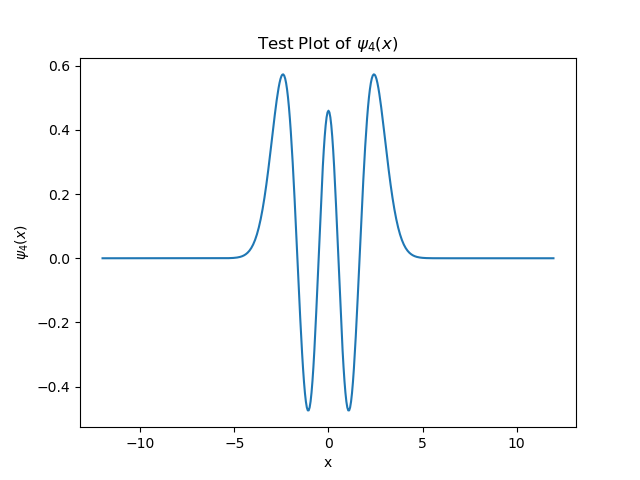

In [7]:
def stationary_state(x,n):
    xi = numpy.sqrt(m*w/hbar)*x
    # Υπολογίστε το psi
    return psi

plt.figure()
plt.plot(x, stationary_state(x,4))
plt.xlabel(r"x")
plt.ylabel(r"$\psi_4(x)$")
plt.title(r"Test Plot of $\psi_4(x)$")
plt.show()

![$\psi_4$](psi4.png)

#### Ερώτηση 3: Κλασική πυκνότητα πιθανότητας, $P_{κλασική}(x)$
Τώρα ολοκληρώστε τη συνάρτηση `classical_p(x, n)` έτσι ώστε αν δίνονται τα $x$ και $n$, να επιστρέφει την κλασική πυκνότητα πιθανότητας για ένα σωματίδιο με ενέργεια ίση με αυτή του $n^{ιοστού} $ επιπέδου ενέργειας του αρμονικού κβαντικού ταλαντωτή.  Θυμηθείτε ότι $p_{classical}(x)$ θα πρέπει να είναι μηδέν για $|x|> x_{max}$. Θα χρειαστεί να ορίσετε $p_{classical}(x)=0$ για $| x |>x_{max} - \delta x$, δεδομένου ότι $ p_ {classical} (x) $ απειρίζεται για $|x|$ που τείνει πολύ κοντά στο $x_{max}$.

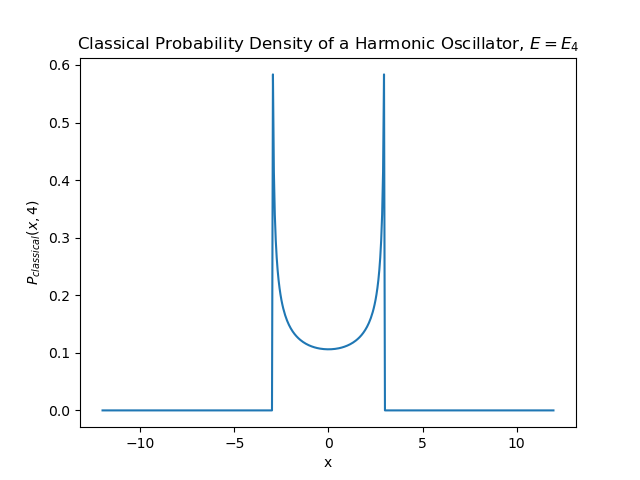

In [8]:
def classical_P(x,n):
    E = hbar*w*(n+0.5)
    x_max = numpy.sqrt(2*E/(m*w**2))
    classical_prob = numpy.zeros(x.shape[0])
# To epsilon παίζει το ρόλο του δx
    epsilon=0.000001
    x_inside = ...
    classical_prob[x_inside] = ...
    return classical_prob

plt.figure()
plt.plot(x, classical_P(x,4))
plt.xlabel(r"x")
plt.ylabel(r"$P_{classical}(x,4)$")
plt.title(r"Classical Probability Density of a Harmonic Oscillator, $E=E_4$")
plt.show()

#### Ερώτηση 4: Απεικόνιση του $ | \psi_n (x) |^2 $

Χρησιμοποιήστε την εντολή [subplot](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) από το [matplotlib](http://matplotlib.org/) για να δημιουργήσετε ένα πλέγμα $3 x 2$ subplots, με ένα γράφημα για το καθένα για τις πυκνότητες πιθανότητας για stationary καταστάσεις: $n = 0,3,8,15,25,40$.  Έκανα το $n = 0$ για εσάς.

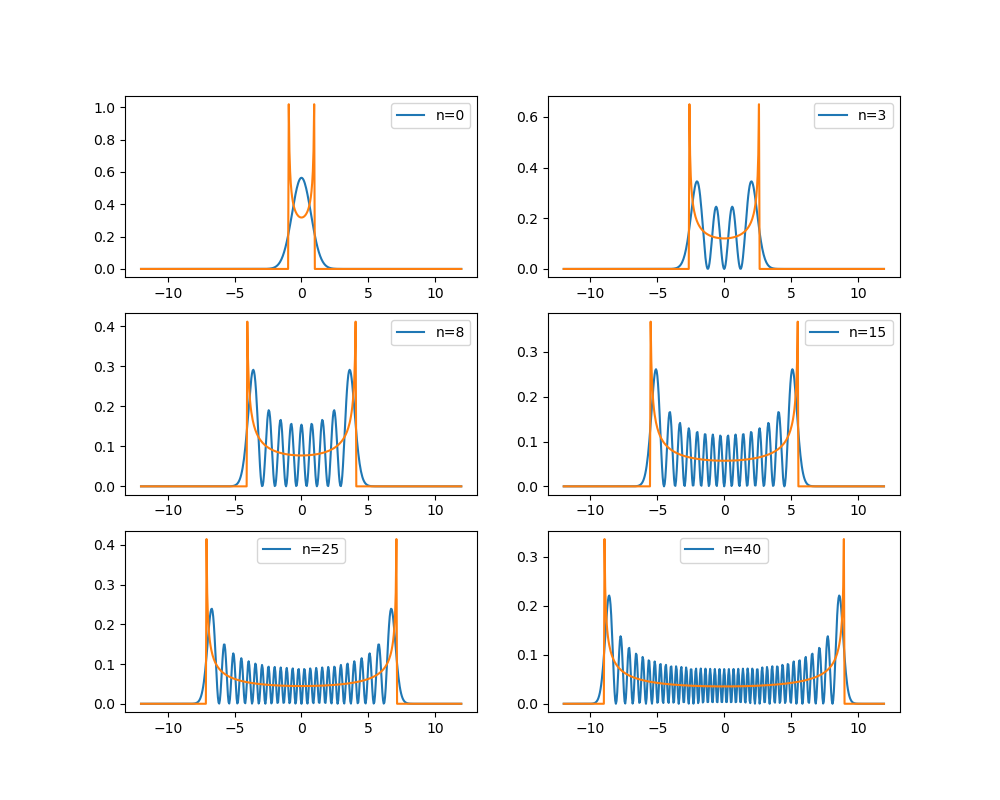

In [9]:
plt.figure(figsize=(10, 8))
plt.subplot(3,2,1)
plt.plot(x, numpy.conjugate(stationary_state(x,0))*stationary_state(x,0), label="n=0")
plt.plot(x, classical_P(x,0))
plt.legend()
# Βάλτε τα υπόλοιπα
plt.show()

#### Ερώτηση 5: Σύγκριση των κλασσικών και κβαντικών αρμονικών ταλαντωτών
Γνωρίζουμε ότι η κβαντική φυσική κάνει συχνά αντι-διαισθητικές προβλέψεις που έρχονται σε αντίθεση με την κλασσική φυσική.  Αλλά γνωρίζουμε επίσης ότι κβαντικά αποτελέσματα δεν εμφανίζονται συχνά στον μακροσκοπικό κόσμο. 

1. Για το παράδειγμα του αρμονικού ταλαντωτή, για ποιες ενέργειες συμφωνούν περισσότερο η κλασσική και η κβαντική φυσική και για ποιες αποκλίνουν πιο έντονα;  

2. Με βάση τα παραπάνω γραφήματα, περιγράψτε μερικές από τις διαφορές που προβλέπονται από την κβαντική και την κλασσική φυσική για τον αρμονικό ταλαντωτή.